### Data Frame
- 판다스에서 제공하는 표 형태의 데이터 구조
- 시리즈가 중첩된 형태
- 머신러닝, 딥러닝 할 때 학습 시킬 데이터를 DataFrame에 넣어서 전달을 많이 함
- index(행을 구분할 때 사용) + column(열을 구분할 때 사용) + value(값)
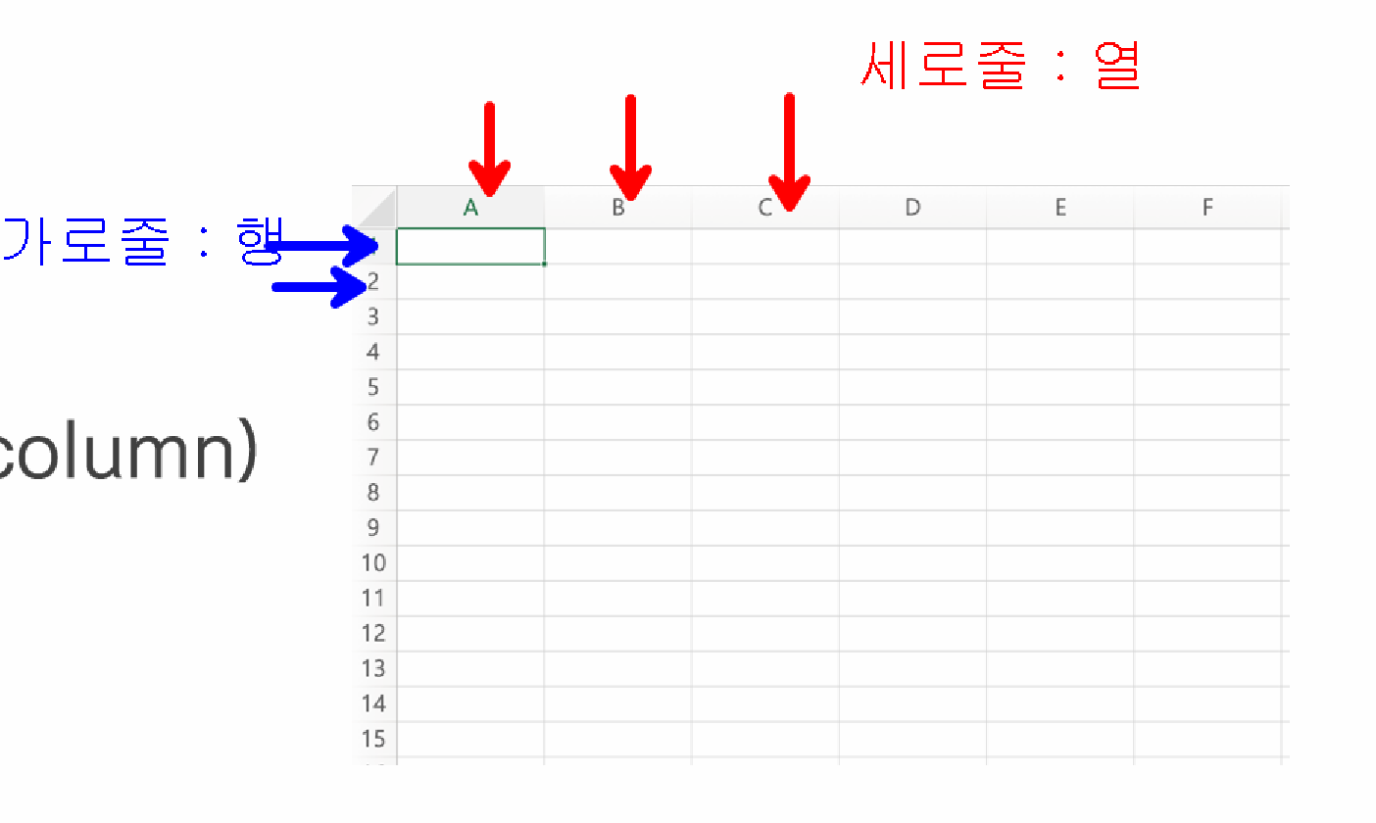

In [1]:
import pandas as pd

In [2]:
# 데이터 프레임 생성
# 딕셔너리를 기반으로 데이터프레임 생성
data = {"2015" : [9904312, 3448737, 2890451, 2466052],
        "2010" : [9631482, 3393191, 2632035, 2431774]}
# 딕셔너리 → DF
# key → column, value → value
df = pd.DataFrame(data)

In [3]:
# 인덱스(행, 가로줄 구분)
df.index = ['서울', '부산', '인천', '대구']
df

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [4]:
# 리스트 기반 DF 생성
data = [[9904312, 3448737, 2890451, 2466052],
        [9631482, 3393191, 2632035, 2431774]]
ind = ['2015', '2010']
col = ['서울', '부산', '인천', '대구']

pd.DataFrame(data, index = ind, columns = col)

,서울,부산,인천,대구
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774


In [5]:
# 행과 열이 뒤바뀐 행렬 → 전치행렬(Transpose)
# 데이터프레임이름.T
df.T

,서울,부산,인천,대구
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774


### DataFrame의 값 확인
- index
- value
- column

In [6]:
print(df.index)
print(df.values)
print(df.columns)

Index(['서울', '부산', '인천', '대구'], dtype='object')
[[9904312 9631482]
 [3448737 3393191]
 [2890451 2632035]
 [2466052 2431774]]
Index(['2015', '2010'], dtype='object')


### DataFrame의 인덱싱, 슬라이싱

- 인덱싱(indexing) : 원하는 데이터를 가져오는 작업
- 인덱스(index) : 데이터를 식별하고 정렬하는 기준, 인덱싱의 재료
- 데이터프레임은 2차원 표 형태의 데이터이기 때문에 index, column을 인덱싱에 사용

In [7]:
print(df['2015'])
# 20215열에 있는 데이터를 뽑아서 시리즈로 전달
# DF은 시리즈가 여러개 중첩된 형태

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 2015, dtype: int64


In [8]:
df[['2015', '2010']]
# 여러개를 한번에 인덱싱하고 싶으면
# 리스트로 묶어서 전달

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [9]:
df[['2015']]
# []안에 컬럼 이름이 1개만 들어가도 리스트로 묶어서 전달하면 DF으로 전달

,2015
서울,9904312
부산,3448737
인천,2890451
대구,2466052


In [10]:
# 컬럼 값 수정
# 컬럼에 접근 -> 새로운 값 넣기
df['2005'] = [9762546, 3512547, 2517680, 2456016]
df

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680
대구,2466052,2431774,2456016


In [11]:
# df['부산']
# 인덱싱 → 컬럼밖에 안됨. 인덱스는 안됨
# 부산이라고 하는 컬럼은 없어서 key Error 발생

In [12]:
# 슬라이싱 -> 인덱스만 가능, 컬럼 안됨
df[1:3]
df['부산' : '인천']

,2015,2010,2005
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680


In [13]:
# 데이터 프레임에서 인덱싱과 슬라이싱
# 인덱스로 쓸 수 있는 게 index, column
# 그래서 (헷갈릴 수 있어서) 인덱싱은 컬럼만(열), 슬라이싱은 인덱스만(행) 가능
# 행과 열을 동시에 지정하지 못함

### indexer(인덱서)
: 인덱싱, 슬라이싱을 위한 전용 객체(도구)
- loc(location), iloc(integer location)
- iloc : 정수를 기반으로 인덱싱
- loc : 이름(라벨)을 기반으로 인덱싱

In [14]:
# iloc
df.iloc[1:3, 1:3]
# iloc[행, 열(모든 열 가져올 때는 생략 가능)]

,2010,2005
부산,3393191,3512547
인천,2632035,2517680


In [15]:
# loc : 이름, 라벨 기반
df.loc[:, '2010':'2005']
# 모든 행을 가져올 때는 :(생략 불가능.)

,2010,2005
서울,9631482,9762546
부산,3393191,3512547
인천,2632035,2517680
대구,2431774,2456016


### 불리언 인덱싱
- 조건을 만족하는 **행**

In [16]:
# 2010년도 인구가 300만 이상인 행 가져오기
# 1. df에서 2010년도 인덱싱
df[df['2010'] >= 3000000]

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547


In [17]:
df.loc[df['2010'] >= 3000000, '2010':'2005']
# 일반적인 인덱싱은 행과 열을 모두 지정할 수 없음.

,2010,2005
서울,9631482,9762546
부산,3393191,3512547


### 데이터 삭제

In [18]:
# del 삭제하고자 하는 데이터 접근

In [19]:
# drop : 2005컬럼 삭제
# 어떤 방향으로 삭제할 건지 명시.
# 방향 -> 축(axis)
# axis = 0 : 세로방향
# axis = 1 : 가로방향
df.drop('2005', axis = 1)
df.drop(columns = '2005', inplace = True)
df

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [20]:
# csv : comma seperated values
data = pd.read_csv('./data/score.csv', index_col = '과목')

In [21]:
# sum() : 합계
data.sum()
# 반별 모든 과목 점수의 합

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [22]:
data.sum(axis = 1)

# axis = 0 : 세로방향(행 기준, 행을 따라 연산)
# axis = 1 : 가로방향(열 기준, 열을 따라 연산)

과목
파이썬    201
DB     282
자바     253
크롤링    298
Web    163
dtype: int64

In [23]:
display(data)
display(data.sum())
# axis = 0(기본값)

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


1반    271
2반    388
3반    295
4반    243
dtype: int64

In [24]:
data['합계'] = data.sum(axis = 1)
data

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [25]:
# 모든 열을 sum할 경우 합계가 계속 증가
# 1반~4반까지 데이터를 슬라이싱 해와서 합계
# 1. 1반~4반까지 모든 행을 슬라이싱
# 2. 슬라이싱한 DF .sum(axis = 1)
# 3. 합계 컬럼에 저장
data['합계'] = data.loc[:, '1반':'4반'].sum(axis = 1)
data

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [26]:
# 평균 컬럼 추가
data['평균'] = data.loc[:, '1반':'4반'].mean(axis = 1)
data

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45,44,73,39,201,50.25
DB,76,92,45,69,282,70.50
자바,47,92,45,69,253,63.25
크롤링,92,81,85,40,298,74.50
Web,11,79,47,26,163,40.75


In [27]:
# 최대값 : max()
# 최소값 : min()
data.loc[:, '1반':'4반'].max(axis = 1)

과목
파이썬    73
DB     92
자바     92
크롤링    92
Web    79
dtype: int64

In [28]:
data.loc[:, '1반':'4반'].min(axis = 1)

과목
파이썬    39
DB     45
자바     45
크롤링    40
Web    11
dtype: int64

In [29]:
maxArr = data.loc[:, '1반':'4반'].max(axis = 1)
minArr = data.loc[:, '1반':'4반'].min(axis = 1)
print(maxArr - minArr)

과목
파이썬    34
DB     47
자바     47
크롤링    52
Web    68
dtype: int64


In [30]:
# apply 함수
# 행이나 열 별로 복잡한 처리를 할 때 사용하는 함수

In [31]:
def max_min(x):
    return x.max() - x.min()

In [32]:
data.loc[:, :'4반'].apply(max_min, axis = 1)
# 행별로 함수 적용 가능

과목
파이썬    34
DB     47
자바     47
크롤링    52
Web    68
dtype: int64

### DataFrame 두 번째 실습
- population.csv

In [36]:
population = pd.read_csv('data/population.csv', index_col = "도시")
population

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [38]:
# 행 인덱싱하기
# 서울 행 인덱싱하기
population.loc["서울"]
population.iloc[0]

지역             수도권
2020       9668465
2015    10022181.0
2010    10312545.0
2005      10167344
Name: 서울, dtype: object

In [40]:
# 열 인덱싱하기
population["2020"]

도시
서울    9668465
부산    3391946
인천    2942828
광주    1450062
대구    2418436
Name: 2020, dtype: int64

In [41]:
# 행 슬라이싱
# 서울~인천 슬라이싱
population["서울":"인천"]

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495


In [43]:
# 열 슬라이싱 -> loc, iloc 행, 열
population.loc["서울":"광주", "지역":"2015"]
population.iloc[:4, :3]

,지역,2020,2015
도시,,,
서울,수도권,9668465,10022181.0
부산,경상권,3391946,NaN
인천,수도권,2942828,2925815.0
광주,전라권,1450062,1474636.0


In [45]:
population.loc["부산":"인천", ['2020', '2005']]
population.iloc[1:3, [1, 4]]

,2020,2005
도시,,
부산,3391946,3628293
인천,2942828,2600495


In [47]:
population.loc[["부산", "광주"], ['2015', '2005']]
population.iloc[[1, 3], [2, 4]]

,2015,2005
도시,,
부산,NaN,3628293
광주,1474636.0,1401745


In [48]:
# 인덱스명 기준으로 오름차순으로 데이터 확인하기
population.sort_index()

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
서울,수도권,9668465,10022181.0,10312545.0,10167344
인천,수도권,2942828,2925815.0,NaN,2600495


In [50]:
# 2010년도 데이터의 값을 오름차순으로 보고 싶을 때
population['2010'].sort_values()
# 2010년도 데이터의 값을 내림차순으로 보고 싶을 때
population['2010'].sort_values(ascending = False)

도시
서울    10312545.0
대구     2431774.0
광주     1454636.0
부산           NaN
인천           NaN
Name: 2010, dtype: float64

In [52]:
# 2010년도 데이터 값을 기준으로 전체 데이터를 오름차순으로 보고 싶을 때
population.sort_values(by = "2010")
# 2010년도 데이터 값을 기준으로 전체 데이터를 내림차순으로 보고 싶을 때
population.sort_values(by = "2010", ascending = True)

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495


In [53]:
# 지역 컬럼을 먼저 정렬하고, 지역이 같을 경우에는 '2020' 컬럼을 기준으로 정렬
population.sort_values(by = ['지역', '2020'])

,지역,2020,2015,2010,2005
도시,,,,,
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
서울,수도권,9668465,10022181.0,10312545.0,10167344
광주,전라권,1450062,1474636.0,1454636.0,1401745


### count 함수
- 각 행, 열 별로 데이터의 개수를 셀 수 있는 함수
- NaN값 제외
- axis = 0 -> 행
- axis = 1 -> 열

In [55]:
population.count(axis = 0) # axis에 따라 읽어올 수 있는 범위가 달라진다, 0은 행

지역      5
2020    5
2015    4
2010    3
2005    5
dtype: int64

In [57]:
population.count(axis = 1) # axis에 따라 읽어올 수 있는 범위가 달라진다, 1은 열

도시
서울    5
부산    3
인천    4
광주    5
대구    5
dtype: int64

In [58]:
population['2020'] + population['2015']

도시
서울    19690646.0
부산           NaN
인천     5868643.0
광주     2924698.0
대구     4884488.0
dtype: float64

In [62]:
# 결측치를 없앨 수 있는 함수 -> fillna (fill NaN의 약자)
population.fillna(0, inplace = True) # 결측치와ㅢ 연산은 결측치 결과가 나오니 0으로 대체하기
# fillna 함수는 바로 적용이 안 됨, inplace 속성 필요.
population

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,0.0,0.0,3628293
인천,수도권,2942828,2925815.0,0.0,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [63]:
population['2020'] + population['2015']

도시
서울    19690646.0
부산     3391946.0
인천     5868643.0
광주     2924698.0
대구     4884488.0
dtype: float64

In [67]:
population.dtypes

지역       object
2020      int64
2015    float64
2010    float64
2005      int64
dtype: object

In [69]:
population = population. astype({'2010':'int', '2015':'int'})
population.dtypes

지역      object
2020     int64
2015     int64
2010     int64
2005     int64
dtype: object

In [77]:
population["합계"] = population.loc["서울":"대구", "2020":"2005"].sum(axis = 1)
population.loc["합계", :] = population.loc["서울":"대구", "2020":"합계"].sum(axis = 0)
population

,지역,2020,2015,2010,2005,합계
도시,,,,,,
서울,수도권,9668465.0,10022181.0,10312545.0,10167344.0,40170535.0
부산,경상권,3391946.0,0.0,0.0,3628293.0,7020239.0
인천,수도권,2942828.0,2925815.0,0.0,2600495.0,8469138.0
광주,전라권,1450062.0,1474636.0,1454636.0,1401745.0,5781079.0
대구,경상권,2418436.0,2466052.0,2431774.0,2456016.0,9772278.0
합계,NaN,19871737.0,16888684.0,14198955.0,20253893.0,71213269.0


### 데이터프레임의 인덱싱, 슬라이싱 정리
- 행 == 인덱스
- 열 == 컬럼
    - 인댁싱
      1. 행 인덱싱: df.loc[인덱스명]
      2. 열 인덱싱: df[컬럼명]

    - 슬라이싱
 
      1. 행 슬라이싱: df[시작인덱스명:끝인덱스명]
      2. 열 슬라이싱: df.loc[시작인덱스명:끝인덱스명, 시작컬럼명:끝컬럼명]

### 데이터프레임 병합하기, 다듬기

### concat
- concat([df1, df2])
- concatenate : 사슬같이 잇다, 연결하다
- 축 설정에 따라 데이터를 병합하는 기준이 달라진다.
  - axis = 0 : 행을 기준으로 병합 (위에서 아래로 병합)
  - axis = 1 : 열을 기준으로 병합 (왼쪽에서 오른쪽으로 병합)
- 인덱스 번호는 유지됨, 재설정을 위해서는 index_ignore - True 속성 값 지정 필요.

In [79]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3']
                   }, index = [0,1,2,3])

df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['C4','C5','C6','C7']},
                  index= [4,5,6,7])

df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['C8','C9','C10','C11']},
                  index= [8,9,10,11])

In [80]:
pd.concat([df1, df2, df3])

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7
8,A8,B8,C8
9,A9,B9,C9


In [81]:
# 다중 인덱스 부여하기
pd.concat([df1, df2, df3], keys = ['x', 'y', 'z'])

A    B    C
x 0    A0   B0   C0
  1    A1   B1   C1
  2    A2   B2   C2
  3    A3   B3   C3
y 4    A4   B4   C4
  5    A5   B5   C5
  6    A6   B6   C6
  7    A7   B7   C7
z 8    A8   B8   C8
  9    A9   B9   C9
  10  A10  B10  C10
  11  A11  B11  C11

In [82]:
# 열(컬럼)을 추가하고 싶다.
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                    'D':['D2','D3','D6','D7'],
                    'F':['F2','F3','F6','F7']
                   }, index = [2,3,6,7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [86]:
pd.concat([df1, df4], axis = 1) # 열이 추가됨

,A,B,C,B,D,F
0,A0,B0,C0,NaN,NaN,NaN
1,A1,B1,C1,NaN,NaN,NaN
2,A2,B2,C2,B2,D2,F2
3,A3,B3,C3,B3,D3,F3
6,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,B7,D7,F7


In [84]:
pd.concat([df1, df4], axis = 0) # 행이 추가됨, default

,A,B,C,D,F
0,A0,B0,C0,NaN,NaN
1,A1,B1,C1,NaN,NaN
2,A2,B2,C2,NaN,NaN
3,A3,B3,C3,NaN,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [87]:
pd.concat([df1, df4], axis = 1, join = "inner") # NaN 없이 병합

,A,B,C,B,D,F
2,A2,B2,C2,B2,D2,F2
3,A3,B3,C3,B3,D3,F3


In [88]:
pd.concat([df1, df4], axis = 0, join = "inner")

,B
0,B0
1,B1
2,B2
3,B3
2,B2
3,B3
6,B6
7,B7


In [89]:
pd.concat([df1, df4], ignore_index = True)

,A,B,C,D,F
0,A0,B0,C0,NaN,NaN
1,A1,B1,C1,NaN,NaN
2,A2,B2,C2,NaN,NaN
3,A3,B3,C3,NaN,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


### merge
- merge(df1, df2)
- merge : 병합하다
- 두 개의 데이터프레임에서 공통된 키값을 기준으로 병합
- 데이터를 기준으로 병합 -> 두 개의 데이터프레임에 공통 데이터 존재
- 특징
  - join 속성
    - inner : 교집합 병합(default)
    - outer : 합집합
    - right : 오른쪽 프레임 기준
    - left : 왼쪽 데이터프레임 기준

In [90]:
df5 = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})

df6 = pd.DataFrame({'key':['K0','K2','K3','K4'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})

In [92]:
pd.merge(df5, df6, on = "key", how = "inner") # on = 공통된 키 지정, how = inner -> 교집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2


In [93]:
pd.merge(df5, df6, on = "key", how = "outer") # on = 공통된 키 지정, how = outer -> 합집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,C1,D1
3,K3,A3,B3,C2,D2
4,K4,NaN,NaN,C3,D3


In [94]:
pd.merge(df5, df6, on = "key", how = "right") # 데이터프레임 적힌 순서대로 확인. 오른쪽에 있는 df를 기준으로 병합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2
3,K4,NaN,NaN,C3,D3


In [95]:
pd.merge(df5, df6, on = "key", how = "left") # 왼쪽에 있는 df를 기준으로 병합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,C1,D1
3,K3,A3,B3,C2,D2


In [2]:
import pandas as pd

In [3]:
df5 = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})

df6 = pd.DataFrame({'key':['K0','K2','K3','K4'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})

In [4]:
# right join
pd.merge(df5, df6, how='right')

# how
# 1. inner : 기준값이 동일한 값만 출력
# 2. outer : 전체값 출력
# 3. left : 먼저 적은 데이터를 기준으로 값 출력
# 4. right : 나중에 적은 데이터를 기준으로 값 출력

# on 속성을 통해서 어떤 컬럼을 기준으로 할 건지 전달
# on 속성을 주지 않으면 컴퓨터가 데이터를 보고 일치하는 컬럼 스스로 찾음

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2
3,K4,NaN,NaN,C3,D3


In [6]:
df_merge = pd.merge(df5, df6, how='right')
df_merge

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2
3,K4,NaN,NaN,C3,D3


In [7]:
# 결측치 채우기
# 변수 이름.fillna(채울값)
df_merge.fillna(0) # 원본  변경하지 않음. inplace = True , 덮어쓰기 과정

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2
3,K4,0,0,C3,D3


In [8]:
# 컬럼별로 다른 값으로 결측치 채워주기.
df_merge.isnull() # 각 데이터가 결측치인지 확인해주는 함수
# isnull 함수 + boolean indexing : 결측치가 있는 행만 필터링

,key,A,B,C,D
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,True,True,False,False


In [9]:
df_merge[df_merge['B'].isnull()]

,key,A,B,C,D
3,K4,NaN,NaN,C3,D3


In [10]:
df_merge[df_merge['A'].isnull()]['A'] = 'A'
df_merge
# []를 사용한 인덱싱을 사용할 경우 원본 데이터의 복사본을 사용하기 때문에
# 아무리 값을 []이용해서 바꿔도 원본에는 적용되지 않음.
# 인덱서를 활용하면 원본 데이터를 변경할 수 있음

C:\Users\notye\AppData\Local\Temp\ipykernel_7516\942379140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge[df_merge['A'].isnull()]['A'] = 'A'


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2
3,K4,NaN,NaN,C3,D3


In [11]:
df_merge.loc[df_merge['A'].isnull(), 'A'] = 'A'
df_merge

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2
3,K4,A,NaN,C3,D3


In [12]:
# B 컬럼에 있는 결측치 -> B로 대체
# 원본 데이터에 반영되게.
df_merge.loc[df_merge['B'].isnull(), 'B'] = 'B'
df_merge

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2
3,K4,A,B,C3,D3
